# Final Data Analysis

Now that the final dataset has been constructed, it's time to do some actual statistical analysis:

## Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (20, 10)})

Read TAASSC syntactic measures from pickle file:

In [2]:
taassc_measures = pd.read_pickle("data_samples/taassc-measures.pkl")
taassc_measures = taassc_measures.sort_values(["L1", "level_id"])
taassc_measures.head()

,answer_id,anon_id,L1,level_id,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl
0,46702,es5,Arabic,3,1.0,19.000000,1.000000,19.000000,0.500000,0.000000
25,9357,dg5,Arabic,3,1.0,10.571429,1.285714,8.222222,0.384615,0.076923
27,39714,eb5,Arabic,3,1.0,14.800000,2.800000,5.285714,0.071429,0.000000
63,38784,eb5,Arabic,3,1.0,5.000000,1.000000,5.000000,1.000000,0.000000
68,31021,ev4,Arabic,3,1.0,11.000000,2.000000,5.500000,0.500000,0.500000


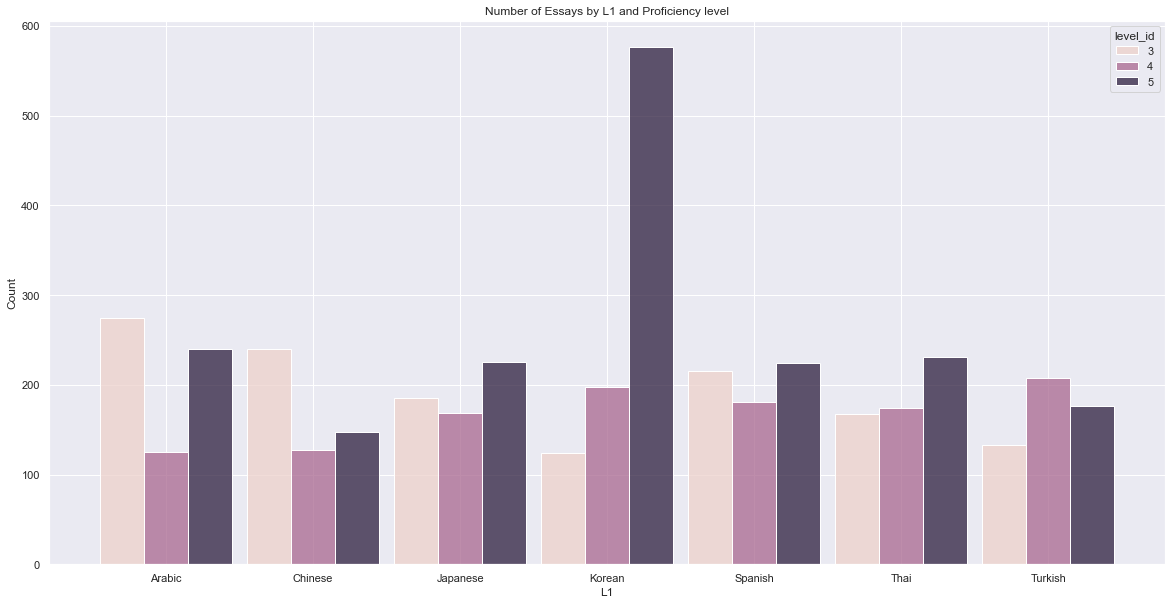

In [3]:
sns.histplot(
    data=taassc_measures,
    x="L1",
    hue="level_id",
    multiple="dodge",
    shrink=0.9
).set(title="Number of Essays by L1 and Proficiency level")
plt.show()

There's a strangely large number of advanced (level 5) Korean essays.
Just to make sure, let's check the number of unique students per L1 by proficiency level:

In [4]:
L1_level_counts = taassc_measures.groupby(["L1", "level_id"])["anon_id"].nunique().reset_index()
L1_level_counts.rename(columns={"anon_id": "count"}, inplace=True)
L1_level_counts

,L1,level_id,count
0,Arabic,3,10
1,Arabic,4,10
2,Arabic,5,10
3,Chinese,3,10
4,Chinese,4,10
5,Chinese,5,10
6,Japanese,3,10
7,Japanese,4,10
8,Japanese,5,10
9,Korean,3,10


Okay, so there's indeed the same number of unique students for every combination of L1 and proficiency level.
Let's plot the average number of essays per user in each group instead:

In [5]:
L1_level_counts["mean_essay_count"] = [
    len(
        taassc_measures[
            (taassc_measures["L1"] == L1_level_counts.iloc[i]["L1"]) &
            (taassc_measures["level_id"] == L1_level_counts.iloc[i]["level_id"])
        ]
    ) / 10 for i in range(len(L1_level_counts))
]
L1_level_counts

,L1,level_id,count,mean_essay_count
0,Arabic,3,10,27.4
1,Arabic,4,10,12.5
2,Arabic,5,10,24.0
3,Chinese,3,10,24.0
4,Chinese,4,10,12.7
5,Chinese,5,10,14.8
6,Japanese,3,10,18.5
7,Japanese,4,10,16.9
8,Japanese,5,10,22.5
9,Korean,3,10,12.4


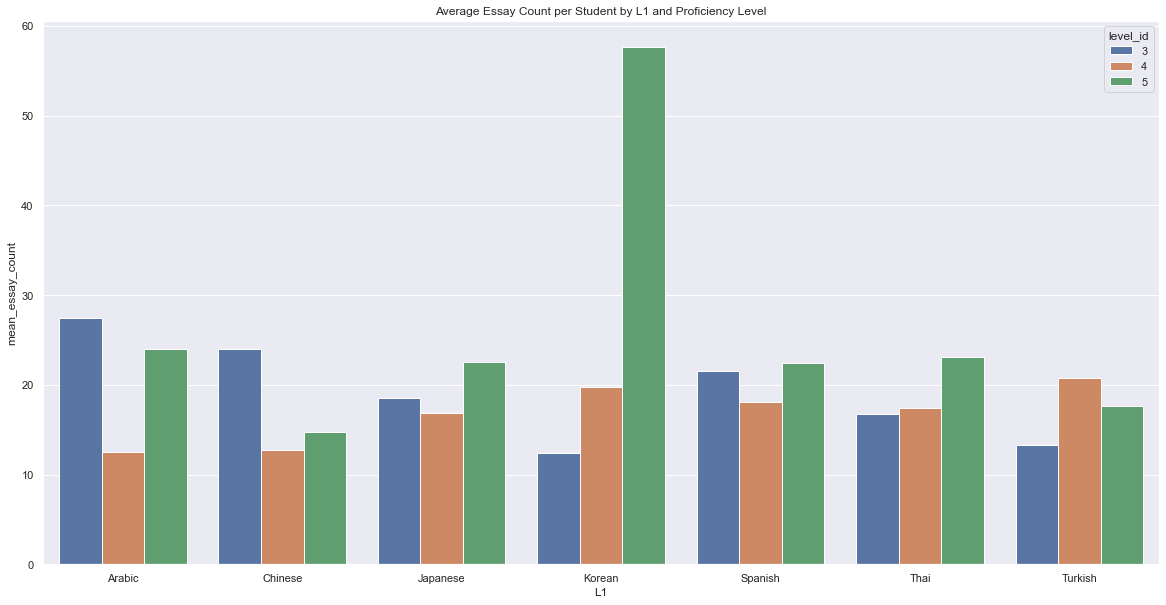

In [6]:
sns.barplot(
    data=L1_level_counts,
    x="L1",
    y="mean_essay_count",
    hue="level_id"
).set(title="Average Essay Count per Student by L1 and Proficiency Level")
plt.show()

That's... really weird.
I have no idea why advanced Korean speakers have so many more essays than any other group.
Could it be because of bad luck with the random sampling?
Or is this a wider trend in the original PELIC dataset?

In [7]:
pelic = pd.read_csv("data/PELIC_compiled.csv")

L1_level_counts_pelic = pelic.groupby(["L1", "level_id"])["anon_id"].nunique().reset_index()
L1_level_counts_pelic.rename(columns={"anon_id": "count"}, inplace=True)
L1_level_counts_pelic = L1_level_counts_pelic[
    L1_level_counts_pelic["L1"].isin(L1_level_counts["L1"]) &
    L1_level_counts_pelic["level_id"].isin(L1_level_counts["level_id"])
]

L1_level_counts_pelic["mean_essay_count"] = [
    len(
        pelic[
            (pelic["L1"] == L1_level_counts_pelic.iloc[i]["L1"]) &
            (pelic["level_id"] == L1_level_counts_pelic.iloc[i]["level_id"])
        ]
    ) / L1_level_counts_pelic.iloc[i]["count"] for i in range(len(L1_level_counts_pelic))
]
L1_level_counts_pelic

,L1,level_id,count,mean_essay_count
1,Arabic,3,244,22.995902
2,Arabic,4,342,17.175439
3,Arabic,5,212,21.358491
7,Chinese,3,86,22.104651
8,Chinese,4,154,19.084416
9,Chinese,5,96,36.635417
33,Japanese,3,21,18.523810
34,Japanese,4,53,22.962264
35,Japanese,5,35,33.600000
37,Korean,3,88,17.613636


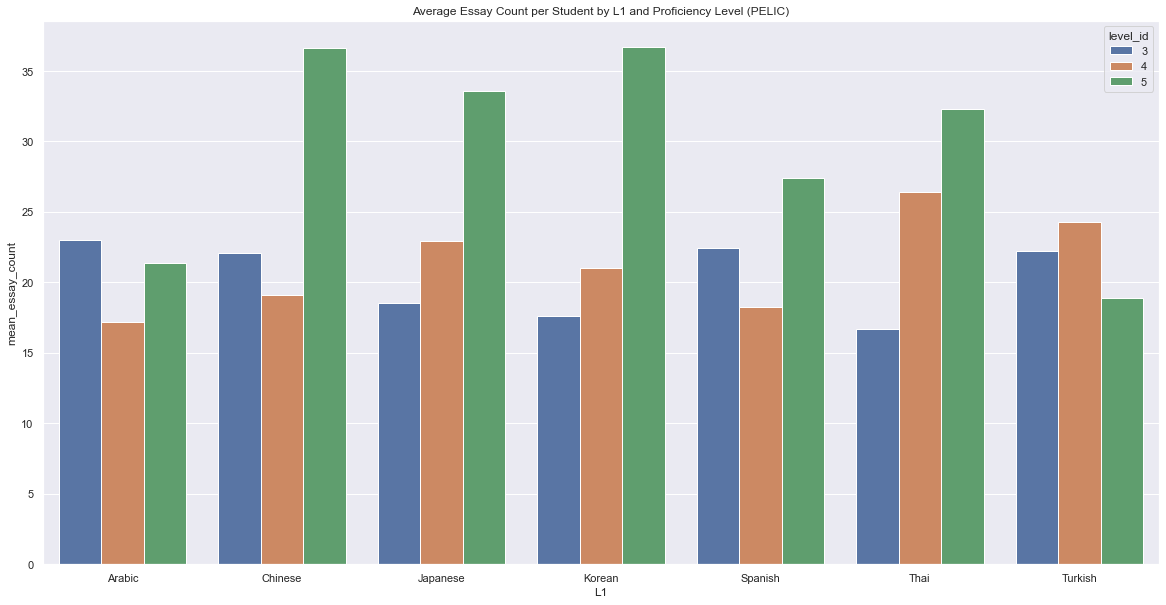

In [8]:
sns.barplot(
    data=L1_level_counts_pelic,
    x="L1",
    y="mean_essay_count",
    hue="level_id"
).set(title="Average Essay Count per Student by L1 and Proficiency Level (PELIC)")
plt.show()

Okay, so it looks like that the distribution of essays isn't nearly as skewed in the original PELIC dataset.
Apparently I just got really unlucky with the random sampling.
Let's check out the distribution of essays for the advanced Korean students in particular just to be sure:

In [9]:
level_counts_korean = taassc_measures[taassc_measures["L1"] == "Korean"]["anon_id"].value_counts().sort_values(ascending=False).reset_index()
level_counts_korean.rename(columns={"index": "anon_id", "anon_id": "count"}, inplace=True)
level_counts_korean

,anon_id,count
0,da3,169
1,fi5,76
2,co5,76
3,gk5,62
4,al5,61
5,ch2,61
6,ay1,60
7,dp5,34
8,fu6,33
9,bq0,32


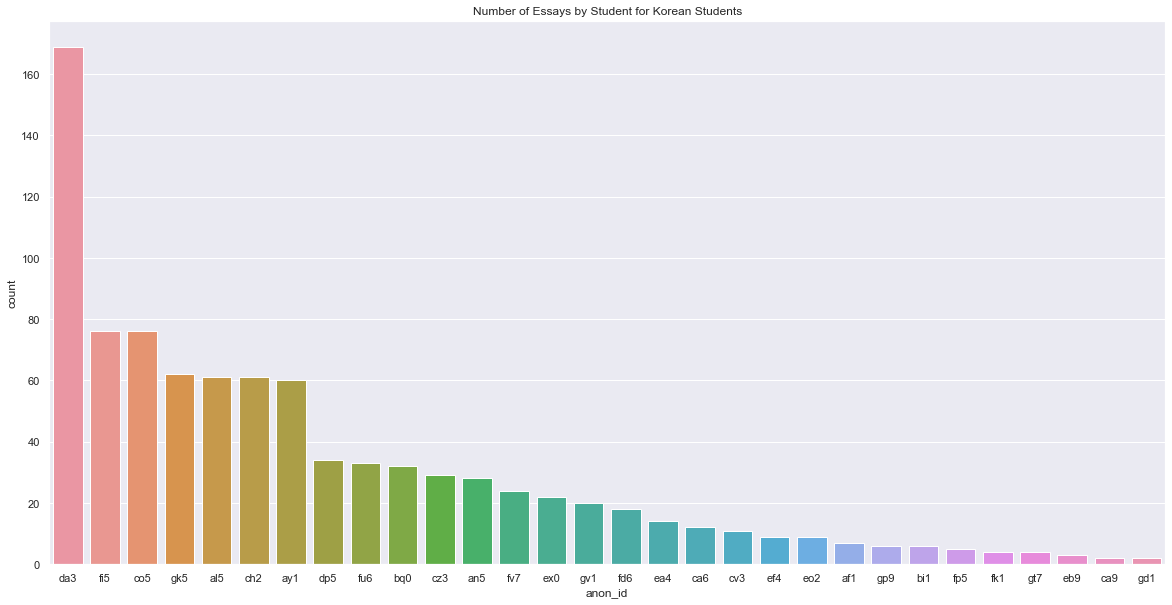

In [10]:
sns.barplot(
    data=level_counts_korean,
    x="anon_id",
    y="count"
).set(title="Number of Essays by Student for Korean Students")
plt.show()

Why does one Korean student have so many more essays than everyone else?
This student has more than twice as many essays as the student with the second-most essays...

Anyway, given that it'd take too long to resample the PELIC data and process it with TAASSC, I don't have much choice but to accept the number of essays from this one Korean student as an outlier.
Hopefully it doesn't affect the results of later analysis in any significant way.

## Analysis of Syntactical Measures by L1 and Proficiency Level

To test for significant differences in syntactic measures between groups, I shall first average the syntactic measures for each combination of L1 and proficiency level:

In [11]:
taassc_measures_grouped = taassc_measures.groupby(["L1", "level_id"])[
    ["T_S", "MLT", "C_T", "MLC", "prep_per_cl", "mark_per_cl"]
].mean().reset_index()
taassc_measures_grouped

,L1,level_id,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl
0,Arabic,3,1.047796,10.843175,1.385440,7.721131,0.294403,0.074706
1,Arabic,4,0.867724,10.692124,1.199498,6.707316,0.267993,0.065287
2,Arabic,5,1.039776,19.950651,1.439759,10.010827,0.267922,0.090244
3,Chinese,3,1.253226,9.092627,1.293612,6.432621,0.243308,0.056523
4,Chinese,4,1.132041,13.494949,1.612868,8.520055,0.235114,0.085407
5,Chinese,5,1.176455,19.207618,2.112082,10.141414,0.322748,0.111291
6,Japanese,3,1.030317,10.116340,1.398916,7.123808,0.260367,0.122461
7,Japanese,4,1.145070,12.641731,1.586249,8.034501,0.277535,0.107579
8,Japanese,5,0.928980,10.243882,1.378805,6.148717,0.234555,0.097057
9,Korean,3,0.949982,10.070382,1.307401,7.787248,0.318759,0.125602


Visualize the means:

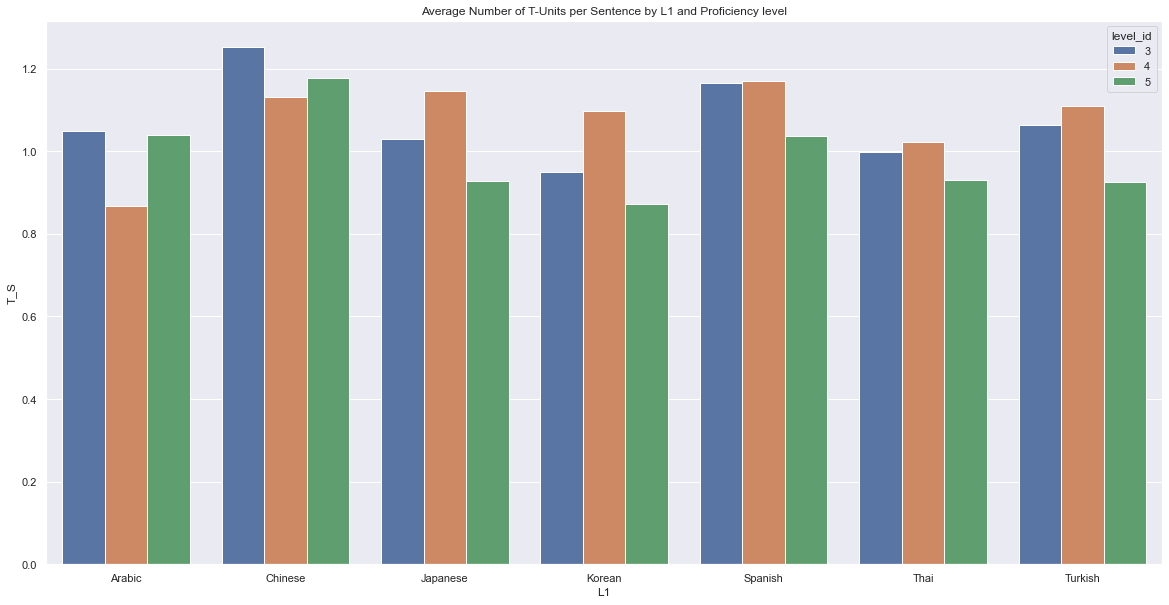

In [12]:
sns.barplot(
    data=taassc_measures_grouped,
    x="L1",
    y="T_S",
    hue="level_id"
).set(title="Average Number of T-Units per Sentence by L1 and Proficiency level")
plt.show()

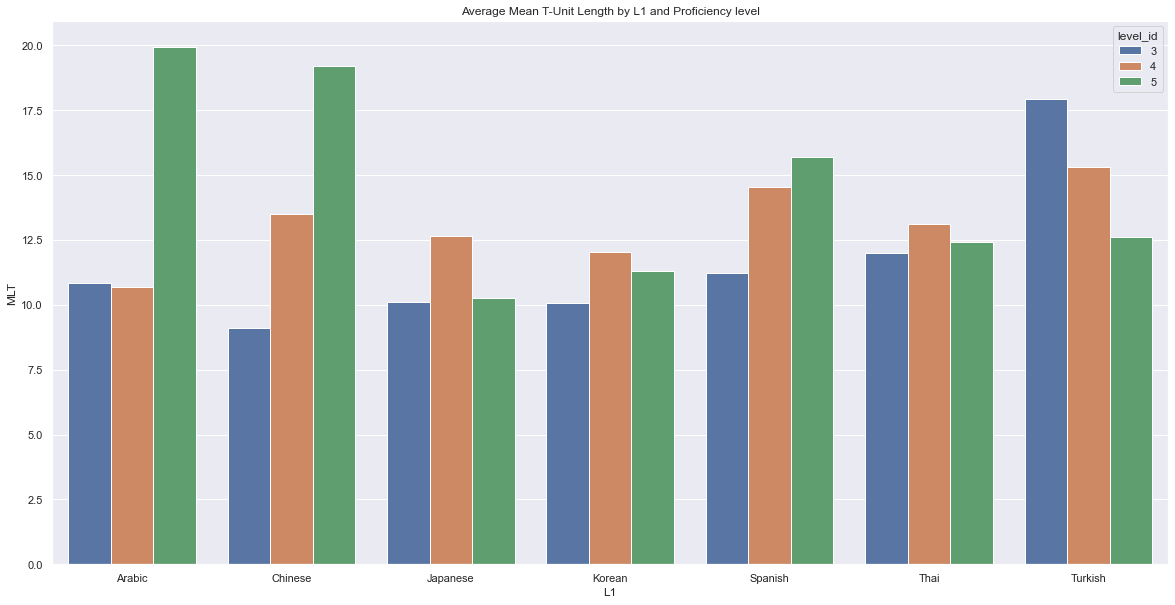

In [13]:
sns.barplot(
    data=taassc_measures_grouped,
    x="L1",
    y="MLT",
    hue="level_id"
).set(title="Average Mean T-Unit Length by L1 and Proficiency level")
plt.show()

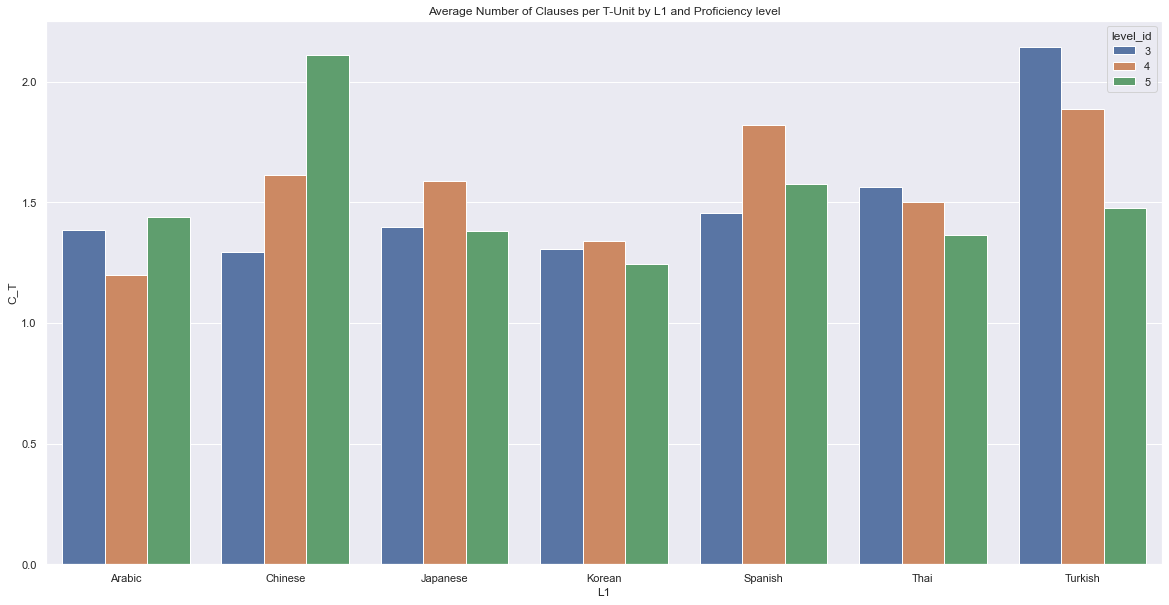

In [14]:
sns.barplot(
    data=taassc_measures_grouped,
    x="L1",
    y="C_T",
    hue="level_id"
).set(title="Average Number of Clauses per T-Unit by L1 and Proficiency level")
plt.show()

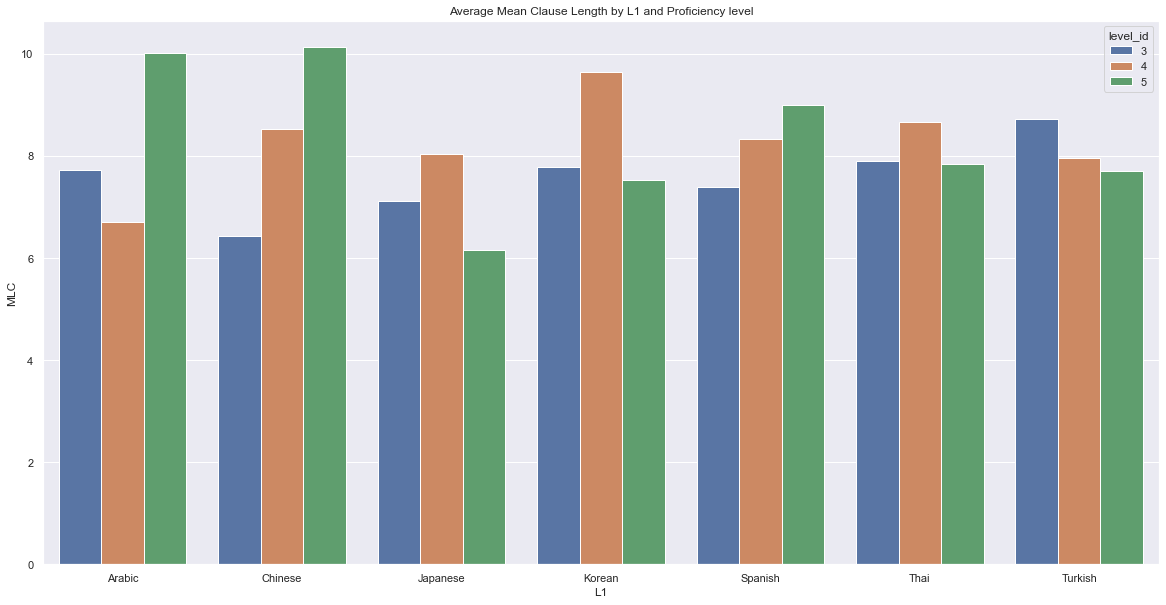

In [15]:
sns.barplot(
    data=taassc_measures_grouped,
    x="L1",
    y="MLC",
    hue="level_id"
).set(title="Average Mean Clause Length by L1 and Proficiency level")
plt.show()

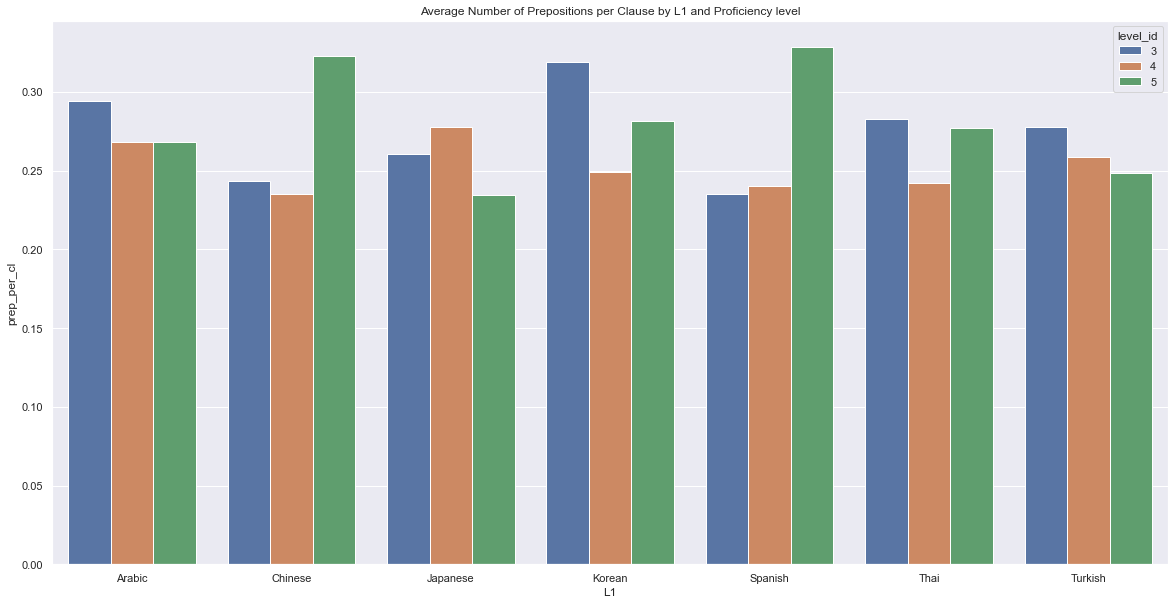

In [16]:
sns.barplot(
    data=taassc_measures_grouped,
    x="L1",
    y="prep_per_cl",
    hue="level_id"
).set(title="Average Number of Prepositions per Clause by L1 and Proficiency level")
plt.show()

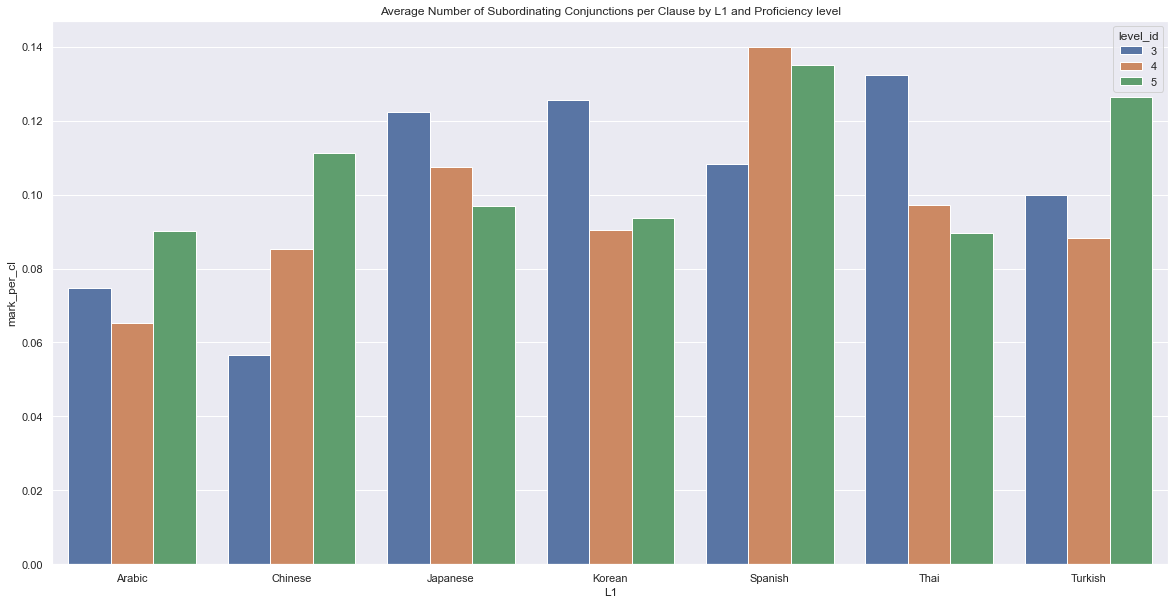

In [17]:
sns.barplot(
    data=taassc_measures_grouped,
    x="L1",
    y="mark_per_cl",
    hue="level_id"
).set(title="Average Number of Subordinating Conjunctions per Clause by L1 and Proficiency level")
plt.show()